In [65]:
import pandas as pd
import numpy as np
import seaborn as sns

In [66]:
df=pd.read_csv('Admission_Predict.csv')

In [67]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [68]:
df.shape

(400, 9)

In [69]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [70]:
from sklearn.preprocessing import Binarizer

In [71]:
bi=Binarizer(threshold=0.75)
df['Chance of Admit ']=bi.fit_transform(df[['Chance of Admit ']])

In [72]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1.0
396,397,325,107,3,3.0,3.5,9.11,1,1.0
397,398,330,116,4,5.0,4.5,9.45,1,1.0
398,399,312,103,3,3.5,4.0,8.78,0,0.0


In [73]:
from sklearn.preprocessing import Binarizer
bi=Binarizer(threshold=0.75)
df['Chance of Admit ']=bi.fit_transform(df[['Chance of Admit ']])


In [79]:
x=df.drop('Chance of Admit ',axis=1)
y=df['Chance of Admit ']

In [80]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


<Axes: xlabel='Chance of Admit ', ylabel='count'>

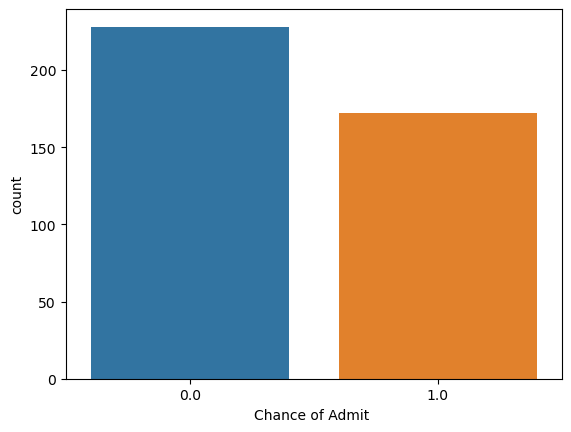

In [81]:
sns.countplot(x=y)

In [82]:
y.value_counts()

Chance of Admit 
0.0    228
1.0    172
Name: count, dtype: int64

In [83]:
#cross validation
from sklearn.model_selection import train_test_split


In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
classifier=DecisionTreeClassifier()

In [87]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [88]:
predicted=classifier.predict(x_test)

In [89]:
new=pd.DataFrame({
    'actual': y_test,
    'predicted': predicted
})

In [90]:
new

,actual,predicted
132,0.0,0.0
309,0.0,0.0
341,1.0,1.0
196,0.0,0.0
246,0.0,0.0
...,...,...
146,0.0,0.0
135,1.0,1.0
390,0.0,0.0
264,0.0,1.0


In [91]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

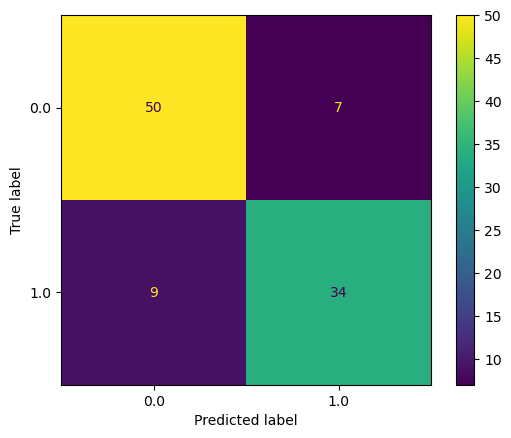

In [92]:
ConfusionMatrixDisplay.from_predictions(predicted,y_test)

In [93]:
accuracy_score(predicted,y_test)

0.84

In [94]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

In [95]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


[Text(0.5298295454545454, 0.9545454545454546, 'x[5] <= 8.655\ngini = 0.492\nsamples = 300\nvalue = [169, 131]\nclass = NA'),
 Text(0.29829545454545453, 0.8636363636363636, 'x[4] <= 4.25\ngini = 0.14\nsamples = 159\nvalue = [147, 12]\nclass = NA'),
 Text(0.21022727272727273, 0.7727272727272727, 'x[0] <= 319.5\ngini = 0.089\nsamples = 150\nvalue = [143, 7]\nclass = NA'),
 Text(0.14772727272727273, 0.6818181818181818, 'x[3] <= 4.75\ngini = 0.056\nsamples = 138\nvalue = [134, 4]\nclass = NA'),
 Text(0.09090909090909091, 0.5909090909090909, 'x[5] <= 8.51\ngini = 0.043\nsamples = 135\nvalue = [132, 3]\nclass = NA'),
 Text(0.045454545454545456, 0.5, 'x[3] <= 3.25\ngini = 0.017\nsamples = 119\nvalue = [118, 1]\nclass = NA'),
 Text(0.022727272727272728, 0.4090909090909091, 'gini = 0.0\nsamples = 89\nvalue = [89, 0]\nclass = NA'),
 Text(0.06818181818181818, 0.4090909090909091, 'x[2] <= 2.5\ngini = 0.064\nsamples = 30\nvalue = [29, 1]\nclass = NA'),
 Text(0.045454545454545456, 0.3181818181818182,

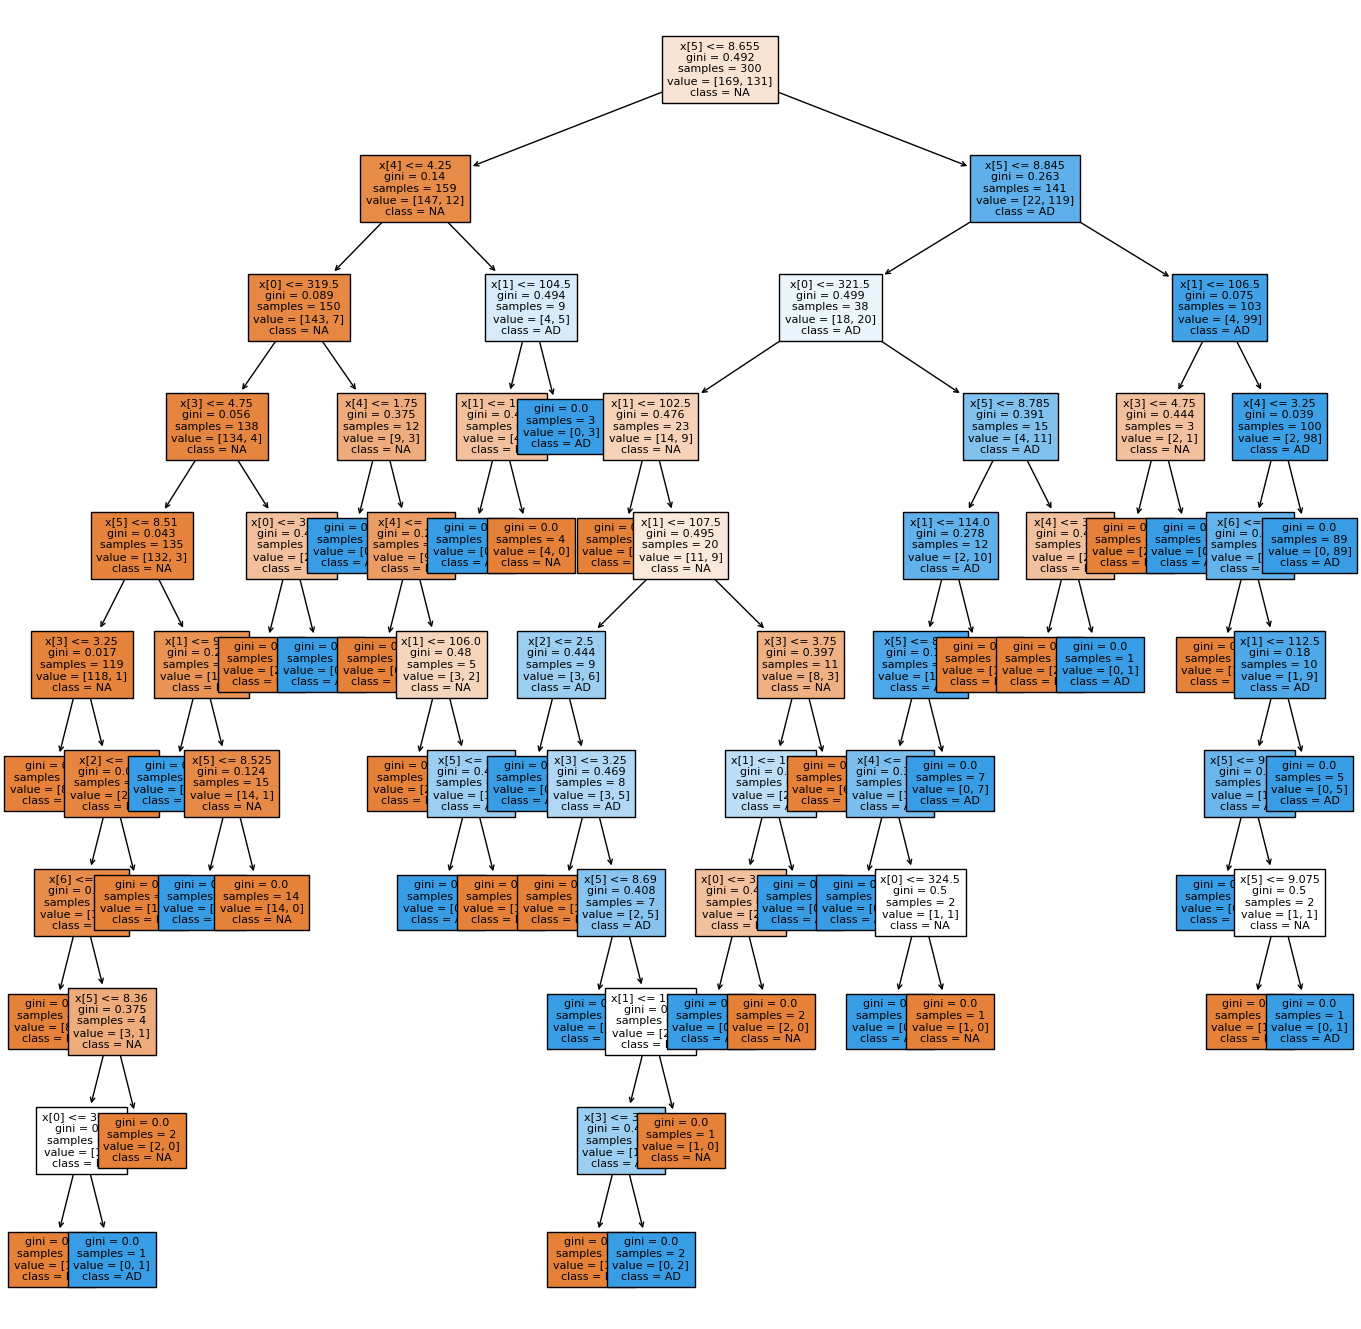

In [98]:
plt.figure(figsize=(17,17))
plot_tree(classifier,fontsize=8,filled=True, class_names=['NA','AD'])